# Useful links

- [ ] https://cran.r-project.org/web/packages/afex/vignettes/introduction-mixed-models.pdf
- [ ] https://cran.r-project.org/web/packages/afex/afex.pdf
- [ ] https://cran.r-project.org/web/packages/afex/index.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_analysing_accuracy_data.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_anova_example.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/messy-data.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/interactions.html
- [ ] https://cran.r-project.org/web/packages/emmeans/vignettes/basics.html
- [ ] https://cran.r-project.org/web/packages/afex/vignettes/afex_mixed_example.html

- [ ] https://osf.io/nfwx7/

- [ ] https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

- [ ] https://psu-psychology.github.io/r-bootcamp-2018/index.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html
- [ ] http://singmann.org/anova-in-r-afex-may-be-the-solution-you-are-looking-for/
- [ ] https://ademos.people.uic.edu/Chapter21.html
- [ ] https://www.psychologie.uni-heidelberg.de/ae/meth/team/mertens/blog/anova_in_r_made_easy.nb.html
- [ ] http://tysonbarrett.com/EDUC-6600/Resources/Example_Ch15_rmANOVA.html

# Setup

## Imports

In [2]:
library("dplyr")
library("tidyr")
library("afex")     # provides mixed() and attaches lme4 automatically.
library("emmeans")  # follow-up tests.
library("multcomp") # advanced control for multiple testing/Type 1 errors.
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'KR', 'S', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: library('emmeans') now needs to be called explicitly!
- Get and set global pac

In [3]:
library("car")
require("lattice")
require("ez")

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: lattice

Loading required package: ez



In [4]:
library("cowplot")
library("ggbeeswarm")

In [5]:
library("nortest")

## Settings

In [6]:
theme_set(theme_bw(base_size = 15) +
            theme(legend.position="bottom",
                  panel.grid.major.x = element_blank()))

In [7]:
options(width=120)

In [8]:
options(width=77)

## Info

In [9]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_IL.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_IL.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_IL.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_IL.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] nortest_1.0-4    ggbeeswarm_0.6.0 cowplot_1.1.0    ez_4.4-0        
 [5] lattice_0.20-41  car_3.0-10       carData_3.0-4    ggplot2_3.3.2   
 [9] multcomp_1.4-14  TH.data_1.0-10   MASS_7.3-53      survival_3.2-7  
[13] mvtnorm_1.1-1    emmeans_1.5.1    afex_0.28-0 

## Handy functions

### Function for logging information BEFORE execution

In [10]:
logging0 <- function(idPath,ifName,odPath,infoStr="",data){
    t0 <- Sys.time()
    ifPath <- file.path(idPath,ifName)
    ofTime <- gsub("\\s","_",t0)
    ofTemp <- substr(paste(gsub("^.","",tempfile("","","")),gsub("^.","",tempfile("","","")),sep=""),0,12)
    ofName <- paste(paste(ifName,"",ofTime,"",ofTemp,infoStr,"_nrow",nrow(data),sep="_"),".RData",sep="")
    ofPath <- file.path(odPath,ofName)
    lfPath = paste(ofPath ,".LOG.txt" ,sep="" ,collapse = "")
    log_msg <- toString(paste(
        paste("ifPath" ,toString(ifPath)     ,sep=": " ,collapse = "")        
      , paste("ofPath" ,toString(ofPath)     ,sep=": " ,collapse = "")        
      , paste("lfPath" ,toString(lfPath)     ,sep=": " ,collapse = "")
      , paste("timeSt" ,toString(Sys.time()) ,sep=": " ,collapse = "")
      , paste("nrows " ,toString(nrow(data)) ,sep=": " ,collapse = "")
      , paste("ncols " ,toString(ncol(data)) ,sep=": " ,collapse = "")
      , paste("vList " ,toString(ls())       ,sep=": " ,collapse = "")
      , "\n"
      , sep="\n"))
    cat(log_msg)
    write(paste(log_msg) ,file=lfPath ,append=TRUE)
    return(list("ofPath"=ofPath,"lfPath"=lfPath,"t0"=t0))
}

### Function for logging information AFTER execution

In [11]:
logging1 <- function(lfName,t0){
    t1 <- Sys.time()
    d1 <- t1-t0
    log_msg <- toString(paste(
        paste("time1" ,toString(Sys.time()) ,sep=": " ,collapse = "")
      , paste("diff1" ,capture.output(d1)   ,sep=": " ,collapse = "")
      , "\n"
      , sep="\n"))
    cat(log_msg)
    write(paste(log_msg) ,file=lfName ,append=TRUE)
    return(list("d1" = d1))
}

# Set in/output directories

In [42]:
idPath <- file.path("data","t1305")
odPath <- file.path("data","t1306")
print(idPath)
print(odPath)

[1] "data/t1305"
[1] "data/t1306"


In [43]:
dir.create(odPath,showWarnings = FALSE,recursive = TRUE)

In [44]:
ifName <- "bigDF__df2.RData" # 752554 obs
ifPath <- file.path(idPath,ifName)
print(ifPath)

[1] "data/t1305/bigDF__df2.RData"


# Load data

Depending on how much data you want to include select a file to be loaded (either by executing relevant cell or by clicking ↑ or ↓ above to move cells up or down, the last executed cell containing `ifName` defines the file to be loaded).

In [45]:
#   FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  FIXME  
# ifPath="data/t1007/bigDF__df2_unstacked__clean.RData" # 752554 obs

In [46]:
load(file=ifPath)

In [47]:
df3 <- df2

## Subset to 13 days

In [48]:
df2 <- subset(df2,day<14) # ~717219 obs

## Subset to messages having at least 5 words

In [49]:
df2 <- subset(df2,wordCnt>4) # ~649262 obs

## Center `DAY` on `0` from `day`

In [50]:
df2$DAY <- scale(df2$day, scale = FALSE)

In [56]:
df2$vb01Prc <- df2$vb01Prc*100
df2$ag01Prc <- df2$ag01Prc*100

# Quick look at data

In [57]:
str(df2, width=88,strict.width="cut")

'data.frame':	649262 obs. of  34 variables:
 $ LBL              : Factor w/ 4 levels "metoo_ctrl","metoo_orig",..: 1 1 1 1 1 1 1 1..
 $ CAMP             : Factor w/ 2 levels "metoo","sexstrike": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE             : Factor w/ 2 levels "ctrl","orig": 1 1 1 1 1 1 1 1 1 1 ...
 $ wordCnt          : int  11 7 11 27 30 26 8 12 12 23 ...
 $ vb01Cnt          : int  0 0 0 2 0 0 1 0 1 0 ...
 $ nn01Cnt          : int  1 2 0 2 3 4 1 4 1 4 ...
 $ ag01Cnt          : int  0 0 0 0 1 1 0 0 1 2 ...
 $ ag02Cnt          : int  0 0 0 0 1 0 0 0 1 0 ...
 $ vb01Prc          : num  0 0 0 7.41 0 ...
 $ nn01Prc          : num  0.0909 0.2857 0 0.0741 0.1 ...
 $ ag01Prc          : num  0 0 0 0 3.33 ...
 $ ag02Prc          : num  0 0 0 0 0.0333 ...
 $ ID               : chr  "919714354467045376" "919714354479722496" "919714354500653"..
 $ init             : Date, format: "2017-10-15" "2017-10-15" ...
 $ date             : Date, format: "2017-10-15" "2017-10-15" ...
 $ day              : int

In [58]:
## for (ii in colnames(df2)){
##     cat("\n")
##     print(summary(df2[ii]))
## }
summary(df2)

             LBL                CAMP          TYPE           wordCnt      
 metoo_ctrl    :301273   metoo    :583001   ctrl:337684   Min.   :  5.00  
 metoo_orig    :281728   sexstrike: 66261   orig:311578   1st Qu.: 11.00  
 sexstrike_ctrl: 36411                                    Median : 18.00  
 sexstrike_orig: 29850                                    Mean   : 18.43  
                                                          3rd Qu.: 24.00  
                                                          Max.   :106.00  
    vb01Cnt           nn01Cnt          ag01Cnt           ag02Cnt      
 Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000   Min.   :0.0000  
 1st Qu.: 0.0000   1st Qu.: 2.000   1st Qu.: 0.0000   1st Qu.:0.0000  
 Median : 1.0000   Median : 3.000   Median : 0.0000   Median :0.0000  
 Mean   : 0.8099   Mean   : 3.758   Mean   : 0.6895   Mean   :0.2575  
 3rd Qu.: 1.0000   3rd Qu.: 5.000   3rd Qu.: 1.0000   3rd Qu.:0.0000  
 Max.   :17.0000   Max.   :43.000   Max.   :21.00

# Overview Plot

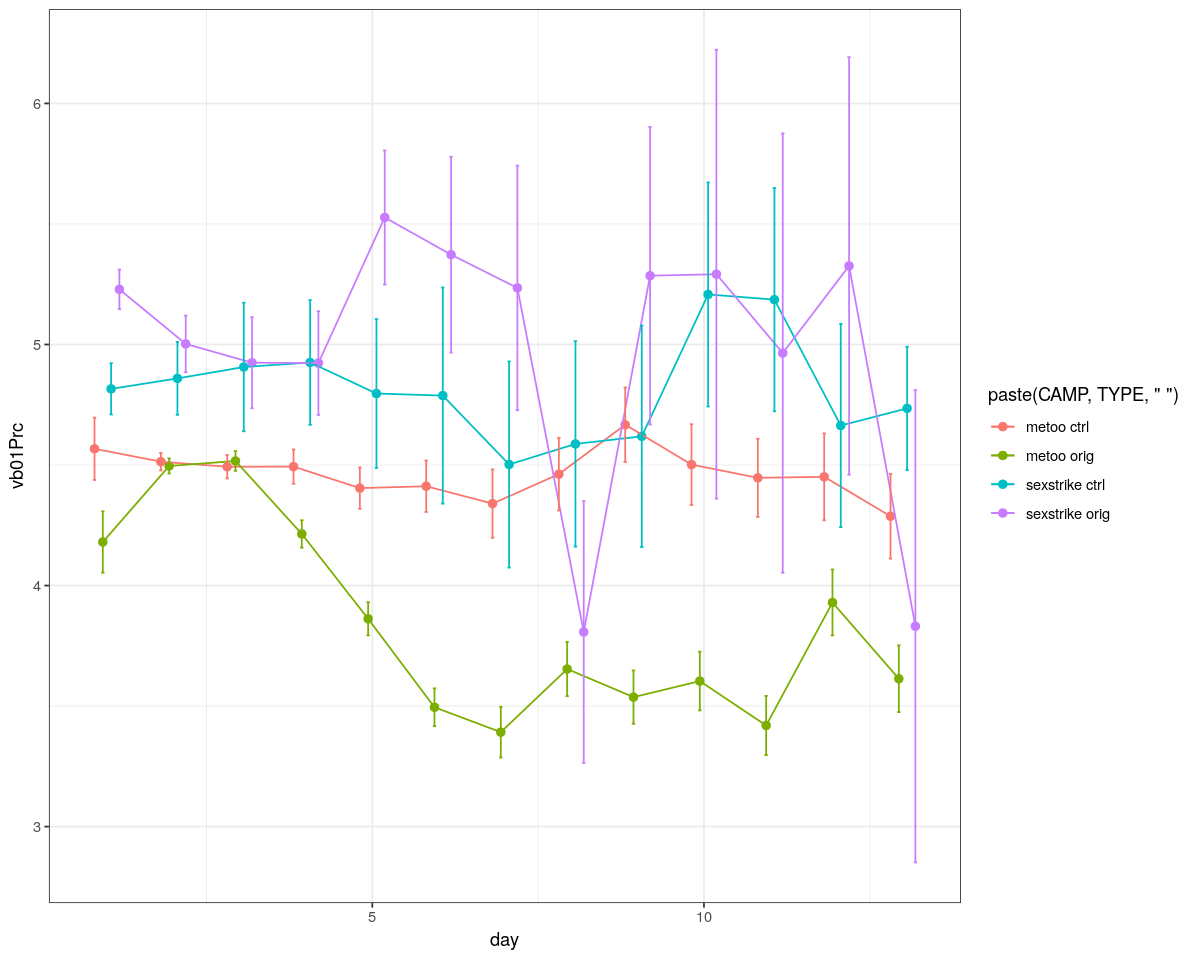

In [59]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.5)
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc,color=paste(CAMP,TYPE," ") ))
## gg0 <- gg0+geom_point(position = position_jitter(0.4), alpha = 1/100)
## gg0 <- gg0+ggbeeswarm::geom_quasirandom(alpha = 0.3)
gg0 <- gg0+stat_summary(position = jt0, geom = "point", fun.data = mean_cl_normal, size = 2)
gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun.data = mean_cl_normal, size = 0.5)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
gg0 <- gg0+theme_bw()
gg0

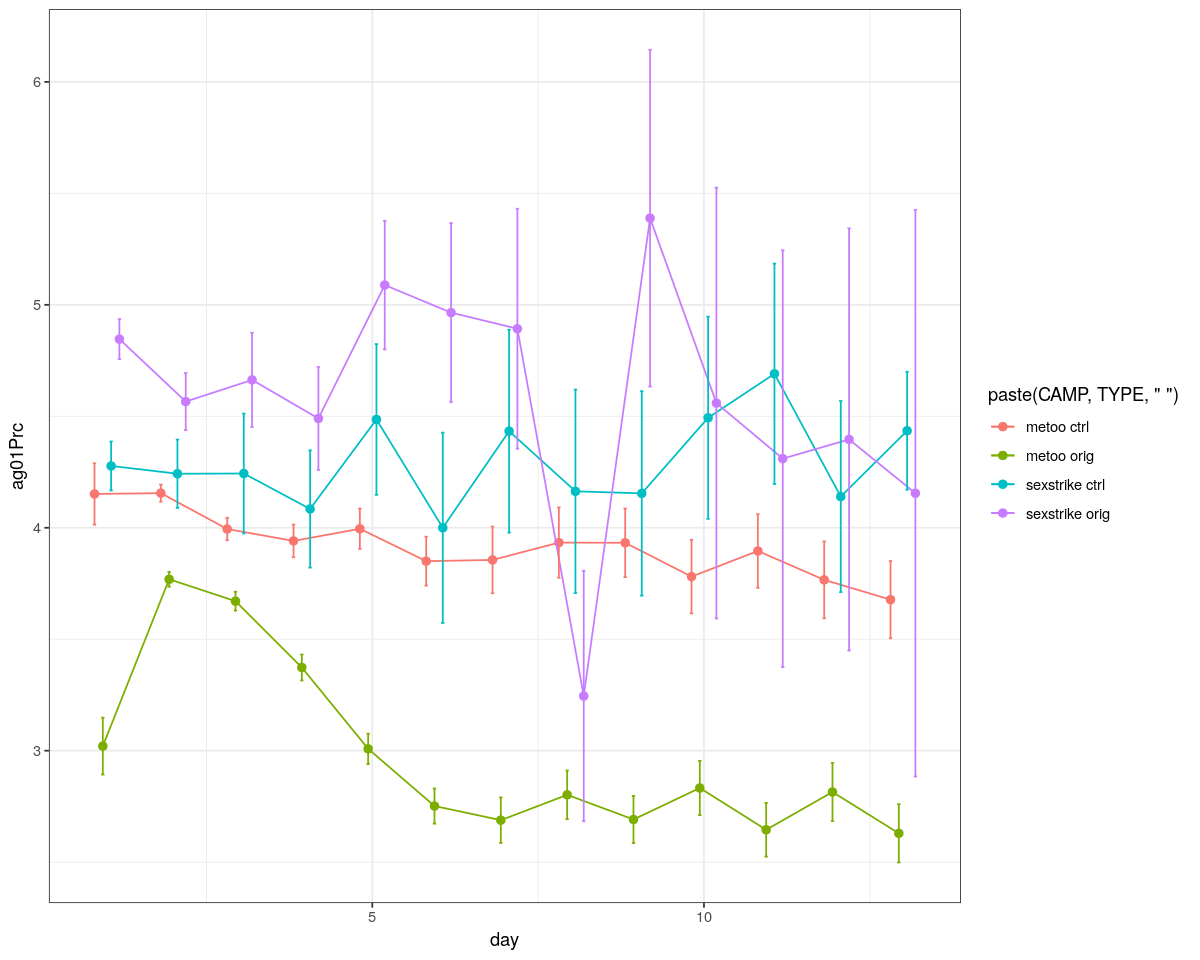

In [60]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.5)
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = ag01Prc,color=paste(CAMP,TYPE," ") ))
## gg0 <- gg0+geom_point(position = position_jitter(0.4), alpha = 1/100)
## gg0 <- gg0+ggbeeswarm::geom_quasirandom(alpha = 0.3)
gg0 <- gg0+stat_summary(position = jt0, geom = "point", fun.data = mean_cl_normal, size = 2)
gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun.data = mean_cl_normal, size = 0.5)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
gg0 <- gg0+theme_bw()
gg0

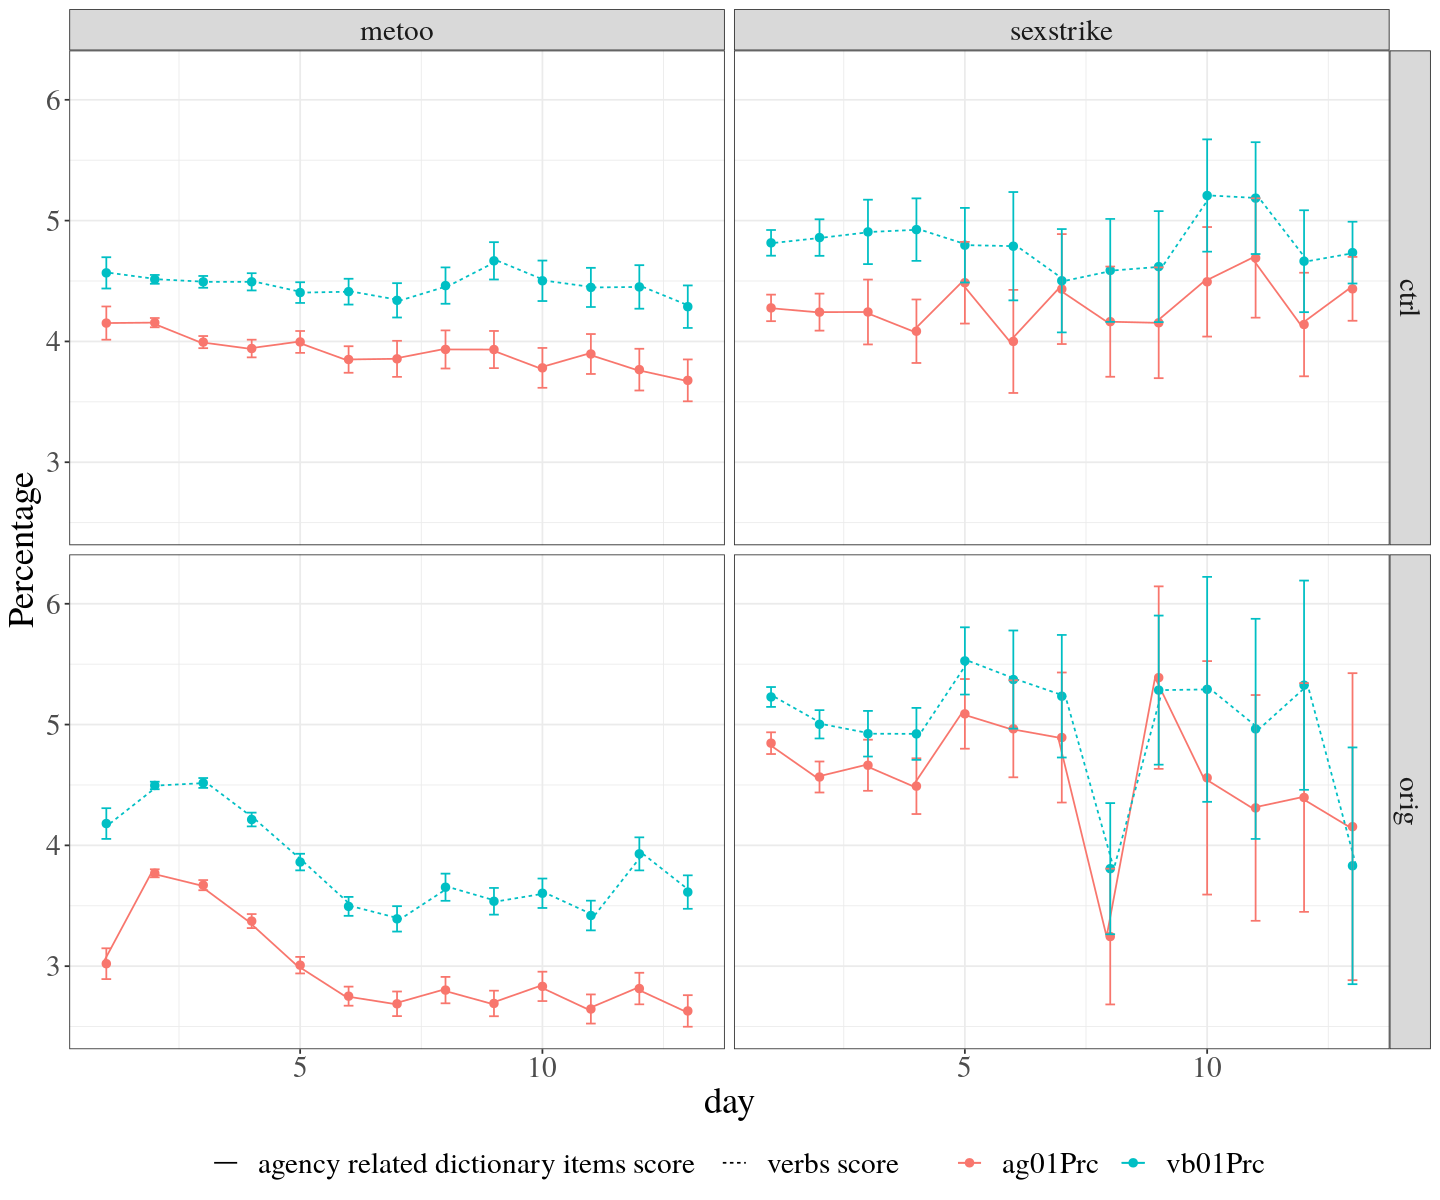

In [67]:
options(repr.plot.width=12, repr.plot.height=10)

jt0 <- position_dodge(width=0.3)
gg0 <- df2 %>%
    gather(Measurement,Percentage,vb01Prc,ag01Prc) %>%
    ggplot(aes(x=day, y=Percentage, group=Measurement, color=Measurement))

gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun = mean,aes(linetype=Measurement))
gg0 <- gg0+stat_summary(geom = "point", fun.data = mean_cl_normal, size = 2) 
gg0 <- gg0+stat_summary(geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)


gg0 <- gg0+scale_linetype_discrete(name ="",
                                labels=c(
                                    "vb01Prc"     = "verbs score"
                                  , "ag01Prc"     = "agency related dictionary items score"
                            ))
gg0 <- gg0+scale_color_discrete("")

gg0 <- gg0+facet_grid(cols = vars(CAMP), rows = vars(TYPE))

gg0 <- gg0+theme_bw()
gg0 <- gg0+theme(legend.position="bottom")
gg0 <- gg0+theme(text=element_text(size=22))
gg0 <- gg0+theme(text=element_text(family="Times"))
gg0

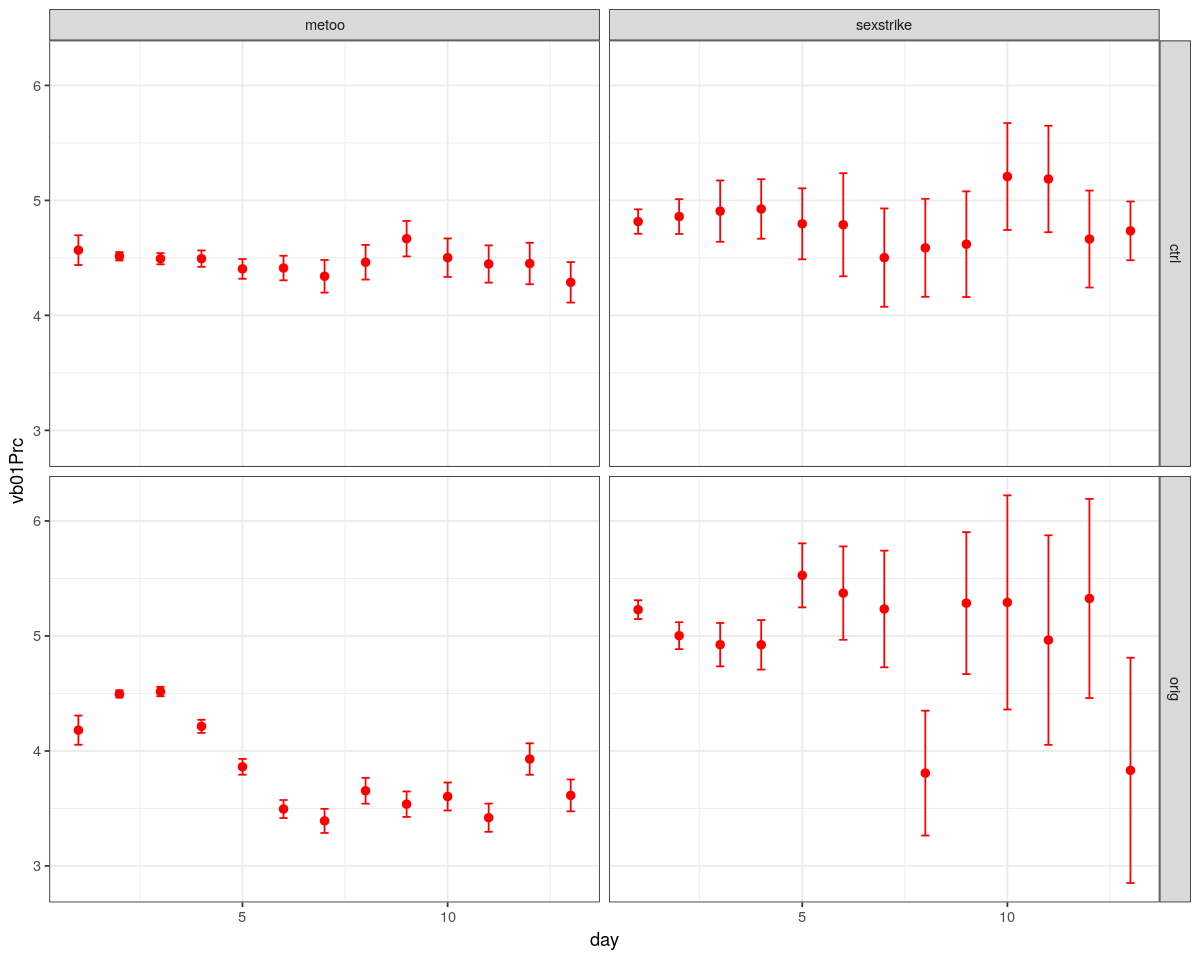

In [62]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc))+
  ## geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

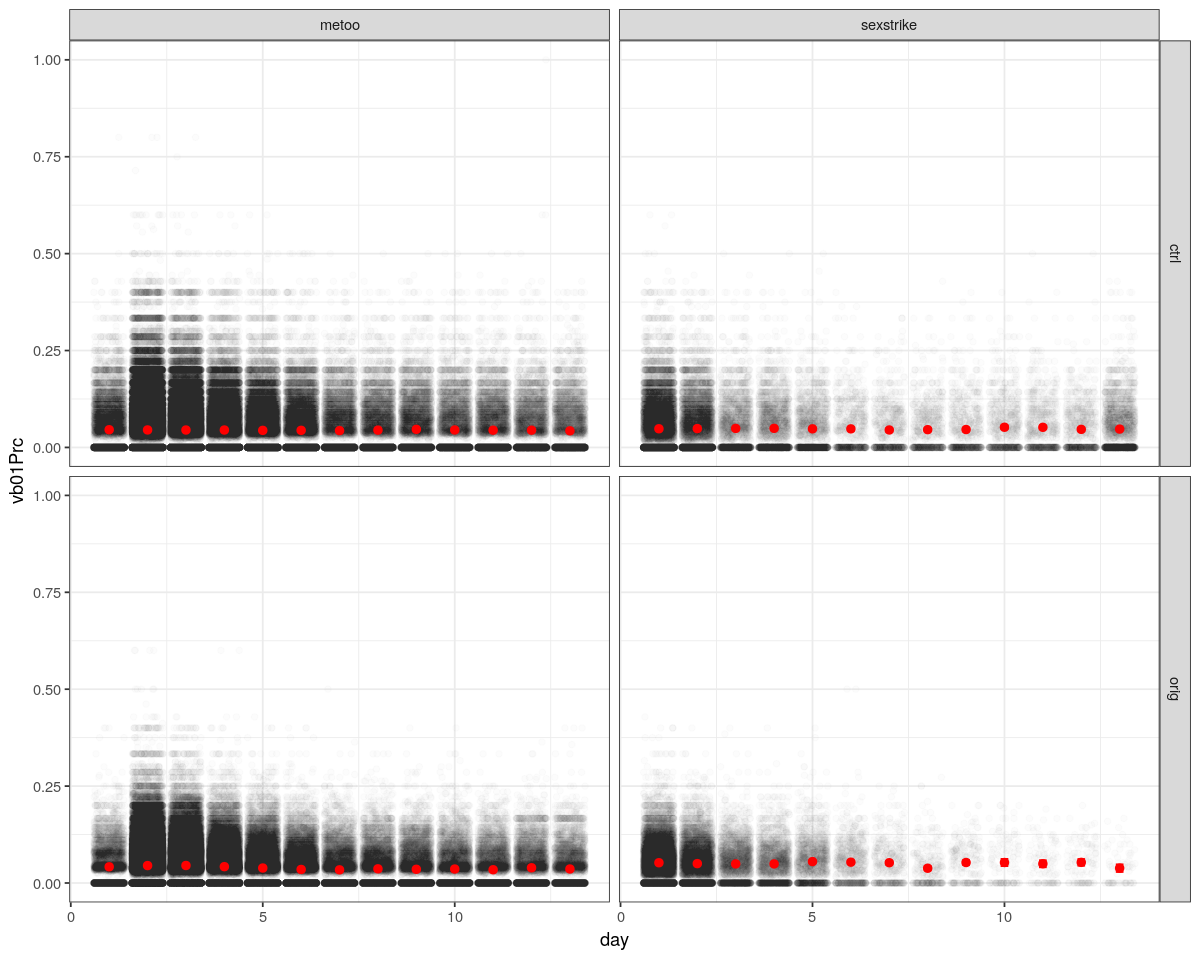

In [23]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = vb01Prc))+
  geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

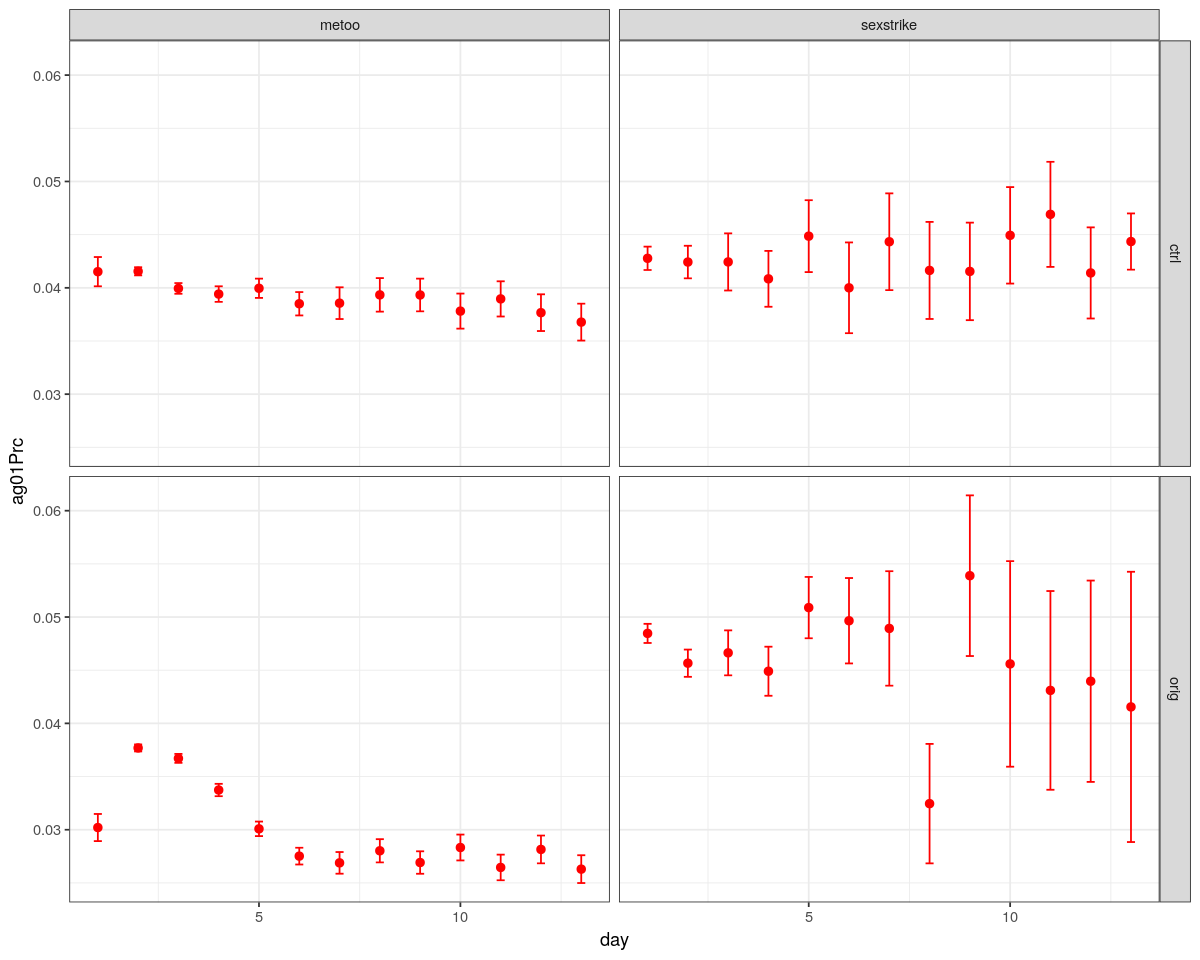

In [24]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = ag01Prc))+
  ## geom_point(position = position_jitter(0.4), alpha = 1/10)+
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

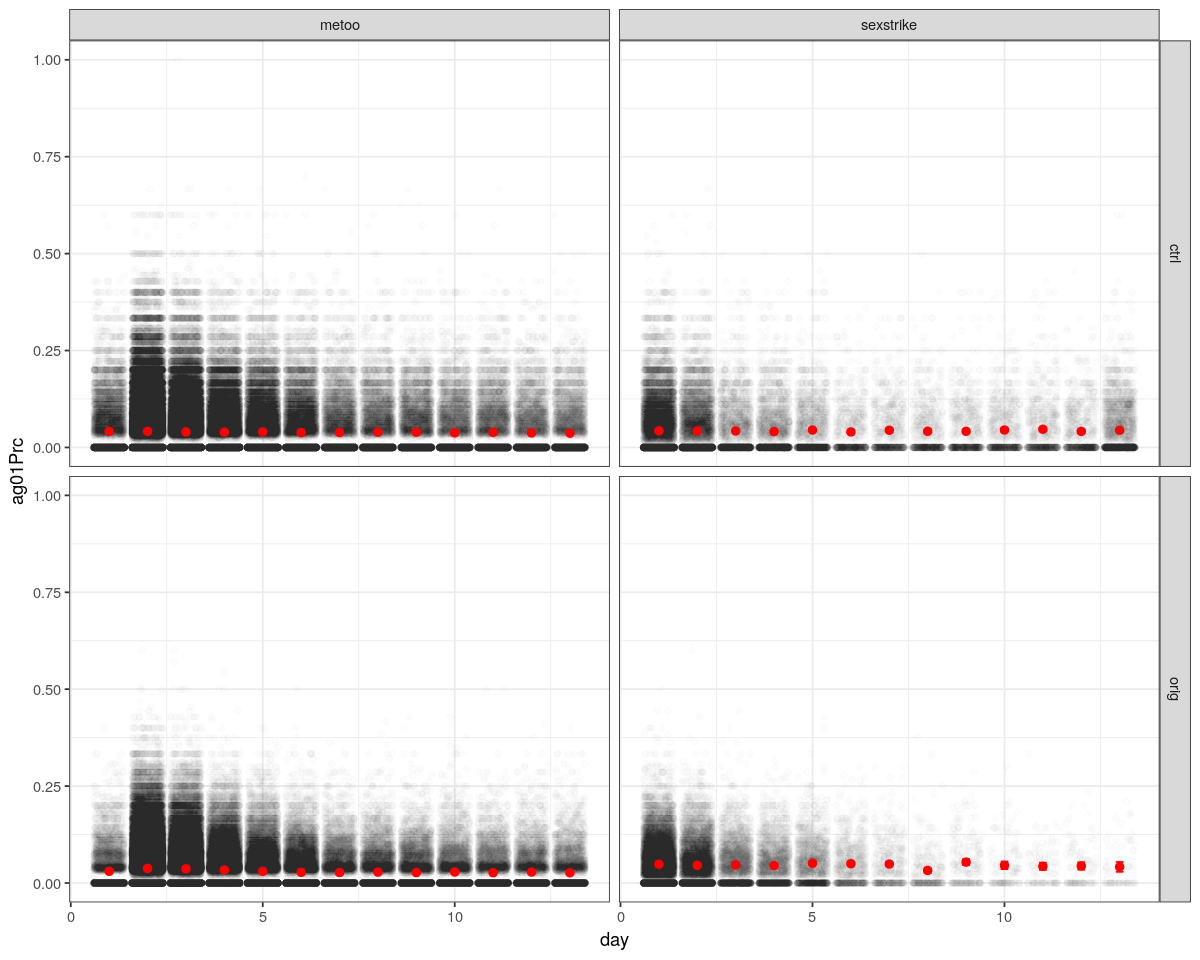

In [25]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = ag01Prc))+
  geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

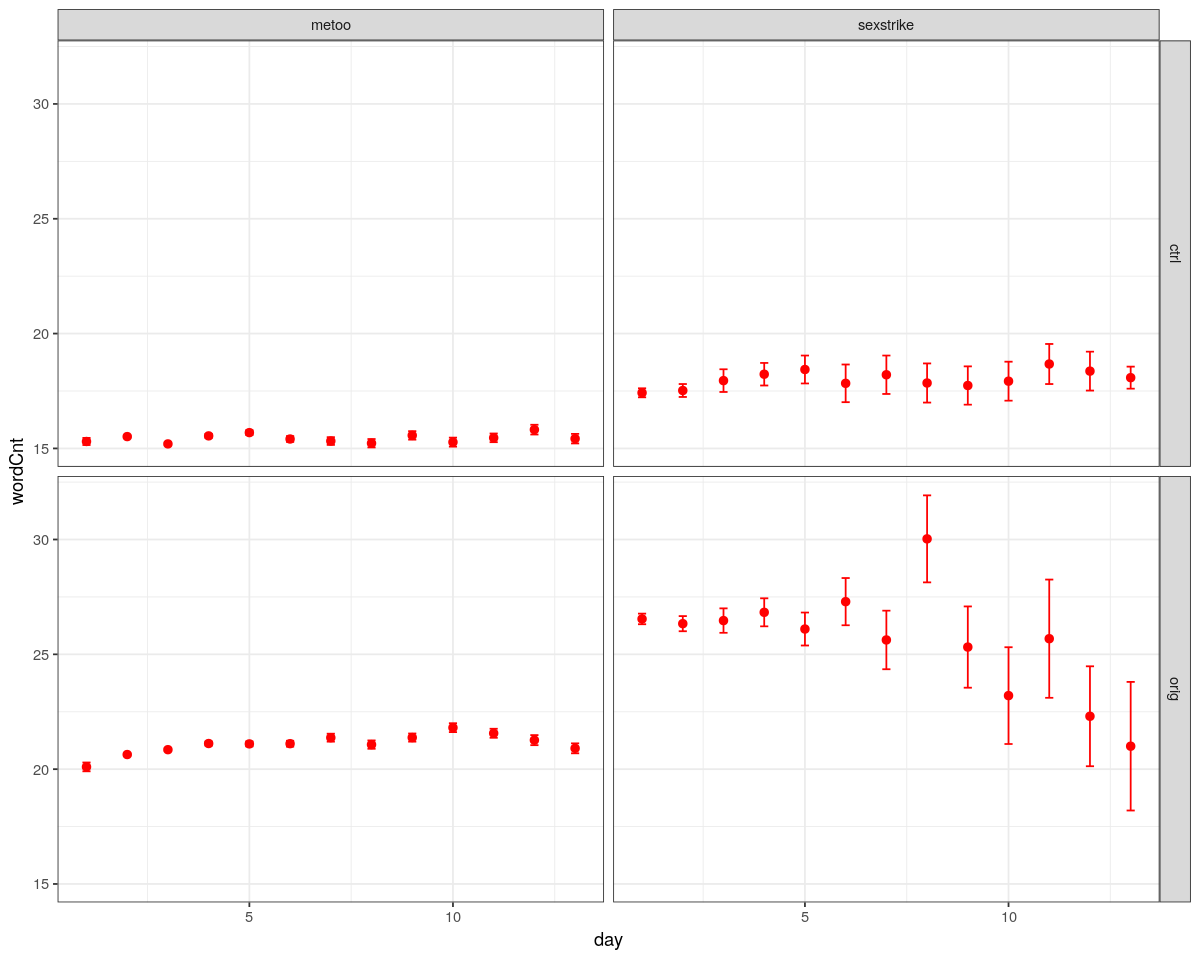

In [26]:
gg0 <- df2 %>% ggplot(mapping = aes(x = day, y = wordCnt))+
  ## geom_point(position = position_jitter(0.4), alpha = 1/100)+
  ## ggbeeswarm::geom_quasirandom(alpha = 0.3) +
  stat_summary(geom = "point", fun.data = mean_cl_normal, color = "red", size = 2) +
  stat_summary(geom = "errorbar", fun.data = mean_cl_normal, color = "red", width = 0.2) +
  facet_grid(cols = vars(CAMP), rows = vars(TYPE))+
  theme_bw()
gg0

In [27]:
smr0 <- df2 %>%
    group_by(CAMP,TYPE) %>%
    summarise(
        N = n(),
        N0 = sum(wordCnt<=2),
        wcM = mean(wordCnt),
        wcSD = sd(wordCnt),
        wcSE = wcSD / sqrt(N),
        vbM = mean(vb01Prc),
        vbSD = sd(vb01Prc),
        vbSE = vbSD / sqrt(N),
        agM = mean(ag01Prc),
        agSD = sd(ag01Prc),
        agSE = agSD / sqrt(N),
        .groups = "drop"
    ) 
smr0

CAMP,TYPE,N,N0,wcM,wcSD,wcSE,vbM,vbSD,vbSE,agM,agSD,agSE
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metoo,ctrl,301273,0,15.43664,7.626682,0.01389490,0.04488258,0.06389695,1.164126e-04,0.04028934,0.06636601,1.209109e-04
metoo,orig,281728,0,20.88223,7.642281,0.01439819,0.04237794,0.05095604,9.600208e-05,0.03435397,0.05258084,9.906323e-05
sexstrike,ctrl,36411,0,17.72418,12.190332,0.06388505,0.04828241,0.06526801,3.420457e-04,0.04277857,0.06702385,3.512474e-04
sexstrike,orig,29850,0,26.46660,14.130396,0.08178660,0.05126843,0.05066267,2.932350e-04,0.04735260,0.05511235,3.189898e-04


In [28]:
df2 %>%
    group_by(CAMP,TYPE) %>%
    summarize(lPW = paste(unique(day), collapse = ","), .groups = "drop")


CAMP,TYPE,lPW
<fct>,<fct>,<chr>
metoo,ctrl,"1,2,3,4,5,6,7,8,9,10,11,12,13"
metoo,orig,"1,2,3,4,5,6,7,8,9,10,11,12,13"
sexstrike,ctrl,"1,2,3,4,5,6,7,8,9,10,11,12,13"
sexstrike,orig,"1,2,3,4,5,6,7,8,9,10,11,12,13"


# Some extras exclusive for #metoo

In [35]:
df3 <- subset(df3,wordCnt>4) # ~681652 obs

In [36]:
df3 <- subset(df3,CAMP=="metoo") # ~ 613635 obs

In [37]:
str(df3)

'data.frame':	613635 obs. of  33 variables:
 $ LBL              : Factor w/ 4 levels "metoo_ctrl","metoo_orig",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CAMP             : Factor w/ 2 levels "metoo","sexstrike": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE             : Factor w/ 2 levels "ctrl","orig": 1 1 1 1 1 1 1 1 1 1 ...
 $ wordCnt          : int  11 7 11 27 30 26 8 12 12 23 ...
 $ vb01Cnt          : int  0 0 0 2 0 0 1 0 1 0 ...
 $ nn01Cnt          : int  1 2 0 2 3 4 1 4 1 4 ...
 $ ag01Cnt          : int  0 0 0 0 1 1 0 0 1 2 ...
 $ ag02Cnt          : int  0 0 0 0 1 0 0 0 1 0 ...
 $ vb01Prc          : num  0 0 0 0.0741 0 ...
 $ nn01Prc          : num  0.0909 0.2857 0 0.0741 0.1 ...
 $ ag01Prc          : num  0 0 0 0 0.0333 ...
 $ ag02Prc          : num  0 0 0 0 0.0333 ...
 $ ID               : chr  "919714354467045376" "919714354479722496" "919714354500653056" "919714354542600192" ...
 $ init             : Date, format: "2017-10-15" "2017-10-15" ...
 $ date             : Date, format: "2017-10-15" "2017-

In [38]:
smr0 <- df3 %>%
    group_by(CAMP,TYPE) %>%
    summarise(
        N = n(),
        N0 = sum(wordCnt<=2),
        wcM = mean(wordCnt),
        wcSD = sd(wordCnt),
        wcSE = wcSD / sqrt(N),
        vbM = mean(vb01Prc),
        vbSD = sd(vb01Prc),
        vbSE = vbSD / sqrt(N),
        agM = mean(ag01Prc),
        agSD = sd(ag01Prc),
        agSE = agSD / sqrt(N),
        .groups = "drop"
    ) 
smr0

CAMP,TYPE,N,N0,wcM,wcSD,wcSE,vbM,vbSD,vbSE,agM,agSD,agSE
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metoo,ctrl,317320,0,15.43141,7.623185,0.01353280,0.04490575,0.06396794,0.0001135569,0.04017294,0.06624099,1.175921e-04
metoo,orig,296315,0,20.90304,7.643659,0.01404185,0.04206042,0.05079466,0.0000933128,0.03411315,0.05241299,9.628577e-05


In [39]:
df3 %>%
    group_by(CAMP,TYPE) %>%
    summarize(lPW = paste(unique(day), collapse = ","), .groups = "drop")


CAMP,TYPE,lPW
<fct>,<fct>,<chr>
metoo,ctrl,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"
metoo,orig,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"


In [ ]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.5)
gg0 <- df3 %>% ggplot(mapping = aes(x = day, y = vb01Prc,color=paste(CAMP,TYPE," ") ))
## gg0 <- gg0+geom_point(position = position_jitter(0.4), alpha = 1/100)
## gg0 <- gg0+ggbeeswarm::geom_quasirandom(alpha = 0.3)
gg0 <- gg0+stat_summary(position = jt0, geom = "point", fun.data = mean_cl_normal, size = 2)
gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun.data = mean_cl_normal, size = 0.5)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
gg0 <- gg0+theme_bw()
gg0

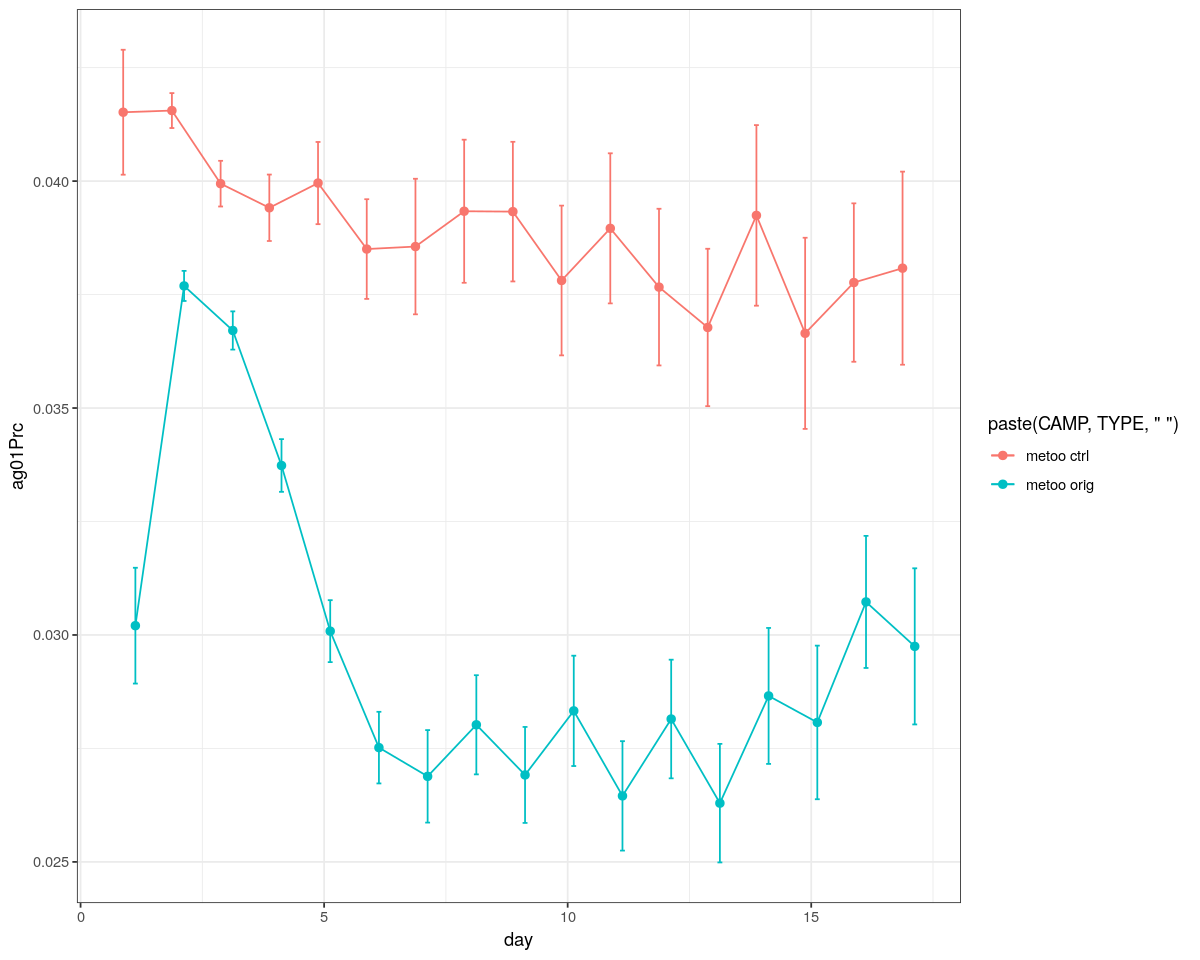

In [40]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
jt0 <- position_dodge(width=0.5)
gg0 <- df3 %>% ggplot(mapping = aes(x = day, y = ag01Prc,color=paste(CAMP,TYPE," ") ))
## gg0 <- gg0+geom_point(position = position_jitter(0.4), alpha = 1/100)
## gg0 <- gg0+ggbeeswarm::geom_quasirandom(alpha = 0.3)
gg0 <- gg0+stat_summary(position = jt0, geom = "point", fun.data = mean_cl_normal, size = 2)
gg0 <- gg0+stat_summary(position = jt0, geom = "line", fun.data = mean_cl_normal, size = 0.5)
gg0 <- gg0+stat_summary(position = jt0, geom = "errorbar", fun.data = mean_cl_normal, width = 0.2)
gg0 <- gg0+theme_bw()
gg0

# ANOVA (`aov_4`)

| name         | meta   | descr                       |
|--------------|--------|-----------------------------|
| `ID`         | `u1`   | observation unit (tweet_id) |
| `vb01Prc`    | `d1`   | outcome (dependent)         |
| `ag01Prc`    | `d2`   | outcome (dependent)         |
| `CAMP`       | `b1`   | between tweet               |
| `TYPE`       | `b2`   | between tweet               |


| name         | meta   | descr                       |
|--------------|--------|-----------------------------|
| `day`        | `b3`   | between tweet               |

In [41]:
OBSERVED <- c("CAMP","TYPE")

In [42]:
OBSERVED <- NULL

In [43]:
FACTORIZE <- TRUE

In [44]:
FACTORIZE <- FALSE

In [45]:
FORMULA <- vb01Prc~CAMP*TYPE*day+(1|ID)

log0 <- logging0(idPath,ifName,odPath,infoStr="_aov_4_a1vb01Prc",data=df2)
a1vb01Prc <- aov_4(
    formula       <- FORMULA,
    data          <- df2,
    observed      <- OBSERVED,
)
save(a1vb01Prc,file=log0$ofPath)
log1 <- logging1(log0$lfPath,log0$t0)

ifPath: data/t1305/bigDF__df2.RData
ofPath: data/t1306/bigDF__df2.RData__2020-10-10_20:51:01__16e7088ba316__aov_4_a1vb01Prc__nrow_649262.RData
lfPath: data/t1306/bigDF__df2.RData__2020-10-10_20:51:01__16e7088ba316__aov_4_a1vb01Prc__nrow_649262.RData.LOG.txt
timeSt: 2020-10-10 20:51:01
nrows : 649262
ncols : 34
vList : data, idPath, ifName, ifPath, infoStr, lfPath, odPath, ofName, ofPath, ofTemp, ofTime, t0



Converting to factor: day

Contrasts set to contr.sum for the following variables: CAMP, TYPE, day



time1: 2020-10-10 20:53:30
diff1: Time difference of 2.471284 mins



In [46]:
FORMULA <- ag01Prc~CAMP*TYPE*day+(1|ID)

log0 <- logging0(idPath,ifName,odPath,infoStr="_aov_4_a2ag01Prc",data=df2)
a2ag01Prc <- aov_4(
    formula       <- FORMULA,
    data          <- df2,
    observed      <- OBSERVED
)
save(a2ag01Prc,file=log0$ofPath)
log1 <- logging1(log0$lfPath,log0$t0)

ifPath: data/t1305/bigDF__df2.RData
ofPath: data/t1306/bigDF__df2.RData__2020-10-10_20:53:30__16e60044ace1__aov_4_a2ag01Prc__nrow_649262.RData
lfPath: data/t1306/bigDF__df2.RData__2020-10-10_20:53:30__16e60044ace1__aov_4_a2ag01Prc__nrow_649262.RData.LOG.txt
timeSt: 2020-10-10 20:53:30
nrows : 649262
ncols : 34
vList : data, idPath, ifName, ifPath, infoStr, lfPath, odPath, ofName, ofPath, ofTemp, ofTime, t0



Converting to factor: day

Contrasts set to contr.sum for the following variables: CAMP, TYPE, day



time1: 2020-10-10 20:55:51
diff1: Time difference of 2.355709 mins



# Quick look at AOV results

In [47]:
summary(a1vb01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,649210,0.003371536,176.924371,2.724483e-04,2.302923e-40
TYPE,1,649210,0.003371536,17.003327,2.619011e-05,3.731902e-05
day,12,649210,0.003371536,5.431700,1.003895e-04,2.527697e-09
CAMP:TYPE,1,649210,0.003371536,49.619153,7.642421e-05,1.868665e-12
CAMP:day,12,649210,0.003371536,5.607278,1.036342e-04,1.028145e-09
TYPE:day,12,649210,0.003371536,2.931642,5.418554e-05,4.385299e-04
CAMP:TYPE:day,12,649210,0.003371536,6.439739,1.190180e-04,1.363340e-11


In [48]:
summary(a2ag01Prc)

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAMP,1,649210,0.003626927,291.715681,4.491377e-04,2.172969e-65
TYPE,1,649210,0.003626927,31.773678,4.893967e-05,1.732961e-08
day,12,649210,0.003626927,5.939208,1.097683e-04,1.854231e-10
CAMP:TYPE,1,649210,0.003626927,111.740093,1.720874e-04,4.093591e-26
CAMP:day,12,649210,0.003626927,9.646154,1.782678e-04,4.345935e-19
TYPE:day,12,649210,0.003626927,3.694667,6.828757e-05,1.339038e-05
CAMP:TYPE:day,12,649210,0.003626927,6.071688,1.122165e-04,9.320701e-11


# Estimated marginal means (Least-squares means)

## Full model

In [ ]:
a1vb01PrcEm1 <- emmeans(a1vb01Prc, specs<-c("CAMP", "TYPE", "day"))
a2ag01PrcEm1 <- emmeans(a2ag01Prc, specs<-c("CAMP", "TYPE", "day"))

In [ ]:
a1vb01PrcEm1

In [ ]:
a2ag01PrcEm1

In [ ]:
pairs(a1vb01PrcEm1)

In [ ]:
pairs(a2ag01PrcEm1)

In [ ]:
TEST=adjusted("bonferroni")

In [ ]:
TEST=adjusted("free")

In [ ]:
summary(as.glht(pairs(a1vb01PrcEm1)),test=TEST)

In [ ]:
summary(as.glht(pairs(a2ag01PrcEm1)),test=TEST)

### Contrasts

In [ ]:
coef(contrast(a2ag01PrcEm1))

In [ ]:
coef(contrast(a1vb01PrcEm1))

## Em2

In [ ]:
a1vb01PrcEm2 <- emmeans(a1vb01Prc, specs<-c("TYPE", "CAMP"), by<-"day")
a2ag01PrcEm2 <- emmeans(a2ag01Prc, specs<-c("TYPE", "CAMP"), by<-"day")

In [ ]:
a1vb01PrcEm2

In [ ]:
a2ag01PrcEm2

In [ ]:
pairs(a1vb01PrcEm2)

In [ ]:
pairs(a2ag01PrcEm2)

In [ ]:
summary(as.glht(pairs(a1vb01PrcEm2)),test=TEST)

In [ ]:
summary(as.glht(pairs(a2ag01PrcEm2)),test=TEST)

# Em3

In [ ]:
a1vb01PrcEm3 <- emmeans(a1vb01Prc, specs<-"day", by<-c("TYPE", "CAMP"))
a2ag01PrcEm3 <- emmeans(a2ag01Prc, specs<-"day", by<-c("TYPE", "CAMP"))

In [ ]:
a1vb01PrcEm3

In [ ]:
a2ag01PrcEm3

In [ ]:
pairs(a1vb01PrcEm2)

In [ ]:
pairs(a2ag01PrcEm2)

# HANDY PLOTS

In [ ]:
plot(a1vb01PrcEm3, comparisons=TRUE, xlab="% Verb")

# Handy plots

In [ ]:
#                      ___           ___                    ___           ___                   
#                     /\  \         /\__\                  /\__\         /\  \         _____    
#        ___          \:\  \       /:/ _/_                /:/ _/_        \:\  \       /::\  \   
#       /\__\          \:\  \     /:/ /\__\              /:/ /\__\        \:\  \     /:/\:\  \  
#      /:/  /      ___ /::\  \   /:/ /:/ _/_            /:/ /:/ _/_   _____\:\  \   /:/  \:\__\ 
#     /:/__/      /\  /:/\:\__\ /:/_/:/ /\__\          /:/_/:/ /\__\ /::::::::\__\ /:/__/ \:|__|
#    /::\  \      \:\/:/  \/__/ \:\/:/ /:/  /          \:\/:/ /:/  / \:\~~\~~\/__/ \:\  \ /:/  /
#   /:/\:\  \      \::/__/       \::/_/:/  /            \::/_/:/  /   \:\  \        \:\  /:/  / 
#   \/__\:\  \      \:\  \        \:\/:/  /              \:\/:/  /     \:\  \        \:\/:/  /  
#        \:\__\      \:\__\        \::/  /                \::/  /       \:\__\        \::/  /   
#         \/__/       \/__/         \/__/                  \/__/         \/__/         \/__/    
#  




Quote from: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html
> The blue bars are confidence intervals for the EMMs, and the red arrows are for the comparisons among them. If an arrow from one mean overlaps an arrow from another group, the difference is not “significant,” based on the adjust setting (which defaults to "tukey") and the value of alpha (which defaults to 0.05). See the “xplanations” supplement for details on how these are derived.

In [ ]:
library(repr)
options(repr.plot.width=8, repr.plot.height=14)
# fig.height = 10
# fig.width = 5
plot(a1vb01PrcEm2, comparisons=TRUE, xlab="% Verb")+
coord_fixed(ratio = 0.001,xlim=c(0.030, 0.055),ylim=NULL,expand=TRUE,clip="on")
#+ 
#  theme(
#      plot.margin = margin(.2,.2,.2,.2, "cm"),
#      plot.background = element_rect(fill = "darkgrey")
#  )

plot(a2ag01PrcEm2, comparisons=TRUE, xlab="% Dict")+
coord_fixed(ratio = 0.001,xlim=c(0.030, 0.055),ylim=NULL,expand=TRUE,clip="on")


# Helpers

In [ ]:
?mixed

In [ ]:
?scale

In [ ]:
?lmer

In [ ]:
?aov_4

In [ ]:
?emmeans

In [ ]:
?coord_fixed

# Extras

In [ ]:
df2$retweets <- as.numeric(df2$retweets) # TODO FIXME This should be fixed elsewhere!

In [ ]:
df2$ReTw <- cut(df2$retweets,
                breaks=c(0, 5, 25, 125, Inf), 
                right  = FALSE,
              # labels=c("low","med","high","viral")
               )

str(df2)

# Playground

In [ ]:
plot_grid(
  afex_plot(
      a1vb01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) + 
    coord_cartesian(ylim = c(0, 1)),
  afex_plot(
      a2ag01Prc, 
      x="TYPE", 
      trace="CAMP",
      error = "between", 
      data_geom = geom_quasirandom, 
      data_alpha = 0.3) +
    coord_cartesian(ylim = c(0, 1))
)

In [ ]:
qqPlot(a1vb01Prc$aov$residuals)

In [ ]:
qqPlot(a2ag01Prc$aov$residuals)

In [ ]:
shapiro.test(a1vb01Prc$aov$residuals)

In [ ]:
shapiro.test(a2ag01Prc$aov$residuals)

In [ ]:
ad.test(a1vb01Prc$aov$residuals)$p.value

In [ ]:
ad.test(a2ag01Prc$aov$residuals)$p.value

In [ ]:
test_levene(a1vb01Prc)

In [ ]:
test_levene(a2ag01Prc)

In [ ]:
library("pwr")

In [ ]:
?pwr.anova.test

In [ ]:
?summary